<a href="https://colab.research.google.com/github/elinteerie/Models/blob/main/Corn_or_Maize_Leaf_Disease_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras


In [3]:
from zipfile import ZipFile

In [4]:
file_name = '/content/drive/MyDrive/datafiles/first.zip'

with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


File Name                                             Modified             Size
data/Blight/Corn_Blight (1).jpeg               2020-11-11 13:39:20       493607
data/Blight/Corn_Blight (1).jpg                2020-11-11 13:39:20        80900
data/Blight/Corn_Blight (10).jpg               2020-11-11 13:39:22        58086
data/Blight/Corn_Blight (100).jpg              2020-11-11 13:39:22        55013
data/Blight/Corn_Blight (1000).JPG             2020-11-11 13:39:22        19898
data/Blight/Corn_Blight (1001).JPG             2020-11-11 13:39:22        11935
data/Blight/Corn_Blight (1002).JPG             2020-11-11 13:39:22        11904
data/Blight/Corn_Blight (1003).JPG             2020-11-11 13:39:22        15404
data/Blight/Corn_Blight (1004).JPG             2020-11-11 13:39:22        10655
data/Blight/Corn_Blight (1005).JPG             2020-11-11 13:39:22        14652
data/Blight/Corn_Blight (1006).JPG             2020-11-11 13:39:22        12344
data/Blight/Corn_Blight (1007).JPG      

In [5]:
dir = '/content/data'

In [15]:
 training = tf.keras.utils.image_dataset_from_directory('/content/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split =.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4188 files belonging to 4 classes.
Using 3351 files for training.


In [17]:
len(training )

105

In [16]:
 validation = tf.keras.utils.image_dataset_from_directory('/content/data',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=42,
    validation_split =.2,
    subset='validation',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4188 files belonging to 4 classes.
Using 837 files for validation.


In [18]:
len(validation)

27

In [19]:
class_names = training.class_names

In [20]:
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

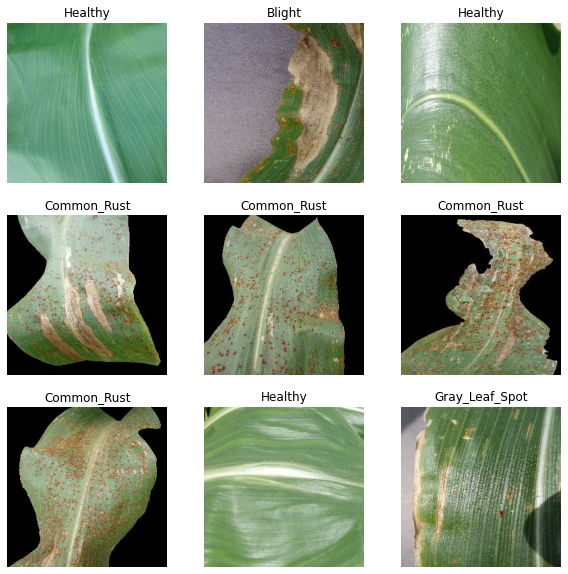

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [32]:
num_classes = len(class_names)
num_classes 

4

In [66]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [67]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_17 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 256, 256, 3)       0         
                                                                 
 conv2d_72 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                

In [38]:
|batch_size = 32
img_height = 256
img_width = 256

In [69]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [71]:
history = model.fit(training, epochs =30, validation_data=validation)

Epoch 1/30
105/105 [==============================] - 13s 122ms/step - loss: 0.1258 - accuracy: 0.9537 - val_loss: 0.2826 - val_accuracy: 0.8984
Epoch 2/30
105/105 [==============================] - 13s 111ms/step - loss: 0.1390 - accuracy: 0.9439 - val_loss: 0.2184 - val_accuracy: 0.9128
Epoch 3/30
105/105 [==============================] - 9s 86ms/step - loss: 0.1208 - accuracy: 0.9564 - val_loss: 0.2853 - val_accuracy: 0.9116
Epoch 4/30
105/105 [==============================] - 9s 86ms/step - loss: 0.1377 - accuracy: 0.9508 - val_loss: 0.2611 - val_accuracy: 0.9056
Epoch 5/30
105/105 [==============================] - 9s 86ms/step - loss: 0.1249 - accuracy: 0.9549 - val_loss: 0.2282 - val_accuracy: 0.9271
Epoch 6/30
105/105 [==============================] - 10s 89ms/step - loss: 0.1055 - accuracy: 0.9603 - val_loss: 0.2345 - val_accuracy: 0.9247
Epoch 7/30
105/105 [==============================] - 10s 89ms/step - loss: 0.1219 - accuracy: 0.9573 - val_loss: 0.2722 - val_accuracy: 

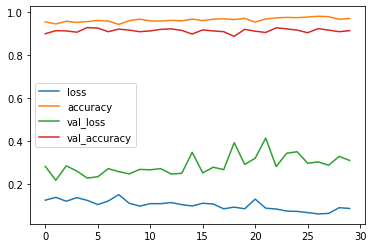

In [72]:
import pandas as pd

pd.DataFrame(history.history).plot()
